<a href="https://colab.research.google.com/github/johannnamr/Discrepancy-based-inference-using-QMC/blob/main/Inference/Bv-beta-distribution/bibeta_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bivariate Beta distribution

### Mount Drive

In [ ]:
# mount my drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The following path has to be adjusted if necessary:

In [ ]:
%run "/content/drive/My Drive/Colab Notebooks/Utils.ipynb"
%run "/content/drive/My Drive/Colab Notebooks/Plot_fcts.ipynb"

Imports:

In [ ]:
import numpy as np
from matplotlib.lines import Line2D

## Sampling

In [ ]:
np.random.seed(21)

In [ ]:
m = 2**26
n = 2**6
theta1 = (1,1,1,1,1)
theta2 = (1.5,1.5,1.5,1.5,1.5)

In [ ]:
i_theta1,_ = divmod(theta1,np.ones(5)) 
i_theta1.astype(int)
qmc = qmcpy.Halton(np.sum(i_theta1.astype(int)),seed=7)

In [ ]:
y_theta1 = sample_bibeta('MC',m,theta1)

In [ ]:
i_theta2,_ = divmod(theta2,np.ones(5)) 
i_theta2.astype(int)
qmc = qmcpy.Halton(np.sum(i_theta2.astype(int)),seed=7)

In [ ]:
y_theta2 = sample_bibeta('MC',m,theta2)

In [ ]:
x_mc_theta1 = sample_bibeta('MC',n,theta1)
x_rqmc_theta1 = sample_bibeta('RQMC',n,theta1)
x_mc_theta2 = sample_bibeta('MC',n,theta2)
x_rqmc_theta2 = sample_bibeta('RQMC',n,theta2)

In [ ]:
rng_min_theta1 = np.min(y_theta1)
rng_max_theta1 = np.max(y_theta1)
num_bins_theta1 = 99
rng_min_theta2 = np.min(y_theta2)
rng_max_theta2 = np.max(y_theta2)
num_bins_theta2 = 99

In [ ]:
y1_theta1 = np.arange(rng_min_theta1, rng_max_theta1, (rng_max_theta1-rng_min_theta1)/num_bins_theta1)
y2_theta1 = np.arange(rng_min_theta1, rng_max_theta1, (rng_max_theta1-rng_min_theta1)/num_bins_theta1)
Y1_theta1, Y2_theta1 = np.meshgrid(y1_theta1, y2_theta1)

In [ ]:
y1_theta2 = np.arange(rng_min_theta2, rng_max_theta2, (rng_max_theta2-rng_min_theta2)/num_bins_theta2)
y2_theta2 = np.arange(rng_min_theta2, rng_max_theta2, (rng_max_theta2-rng_min_theta2)/num_bins_theta2)
Y1_theta2, Y2_theta2 = np.meshgrid(y1_theta2, y2_theta2)

In [ ]:
hist_theta1,_,_ =np.histogram2d(y_theta1[:,0],y_theta1[:,1], bins=num_bins_theta1, density=True)
hist_theta2,_,_ =np.histogram2d(y_theta2[:,0],y_theta2[:,1], bins=num_bins_theta2, density=True)

In [ ]:
SMALL_SIZE = 25
MEDIUM_SIZE = 32
BIGGER_SIZE = 32

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

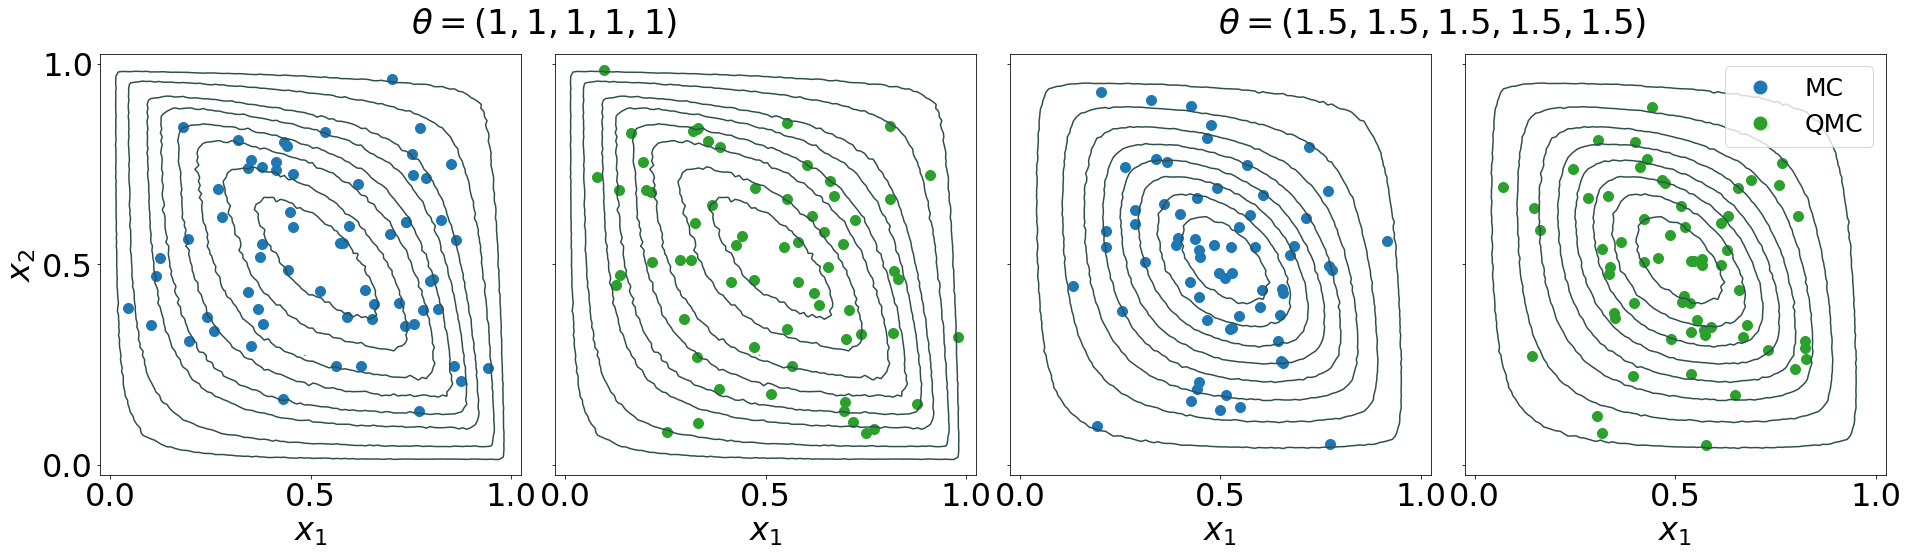

In [ ]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,sharey=True, sharex=True, figsize=(32,7))
cmap = plt.get_cmap("tab10")

# \theta = (1,1,1,1,1)
ax1.contour(Y1_theta1,Y2_theta1,hist_theta1,levels=(0.15,0.4,0.75,1,1.3,1.6,2,2.35),colors='darkslategrey')
ax1.scatter(x_mc_theta1[:,0],x_mc_theta1[:,1],color=cmap(0),s=100)
ax1.set_ylim((-0.025,1.025))
ax1.set_xlim((-0.025,1.025))
ax1.set_xticks(np.arange(0,1.5,0.5)) 
ax1.set_xticks([0,0.5,1]) 
ax1.set_yticks(np.arange(0,1.5,0.5)) 
ax1.set_yticks([0,0.5,1]) 
ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')

ax2.contour(Y1_theta1,Y2_theta1,hist_theta1,levels=(0.15,0.4,0.75,1,1.3,1.6,2,2.35),colors='darkslategrey')
ax2.scatter(x_rqmc_theta1[:,0],x_rqmc_theta1[:,1],color=cmap(2),s=100)
ax2.set_xlabel(r'$x_1$')

# \theta = (1.5,1.5,1.5,1.5,1.5)
ax3.contour(Y1_theta2,Y2_theta2,hist_theta2,levels=(0.1,0.5,1,1.5,2,2.5,3,3.5),colors='darkslategrey')
ax3.scatter(x_mc_theta2[:,0],x_mc_theta2[:,1],color=cmap(0),s=100)
ax3.set_xlabel(r'$x_1$')

ax4.contour(Y1_theta2,Y2_theta2,hist_theta2,levels=(0.1,0.5,1,1.5,2,2.5,3,3.5),colors='darkslategrey')
ax4.scatter(x_rqmc_theta2[:,0],x_rqmc_theta2[:,1],color=cmap(2),s=100)
ax4.set_xlabel(r'$x_1$')


dots = [Line2D([0], [0], marker='o', color='w', label='Scatter',markerfacecolor=cmap(0), markersize=15),Line2D([0], [0], marker='o', color='w', label='Scatter',markerfacecolor=cmap(2), markersize=15)]
ax4.legend(handles=dots, labels=['MC','QMC'])

plt.subplots_adjust(wspace=0.08, hspace=0.05, top=0.96)
fig.text(x=0.26,y=1,s=r'$\theta=(1,1,1,1,1)$',fontsize=34,fontweight=550)
fig.text(x=0.61,y=1,s=r'$\theta=(1.5,1.5,1.5,1.5,1.5)$',fontsize=34,fontweight=550)

plt.savefig('bibeta_scatter.png',bbox_inches = 'tight', pad_inches = .1)
plt.show()